# 03. MVPs
A number of simple models to test initial assumptions

In [1]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from modules.fm_functions import *
predict_columns = FM_columns[2:]

Load data

In [4]:
import pandas as pd
combined_data = pd.read_csv('./data/combined_data.csv', index_col='Name').iloc[:, 1:].dropna(axis=0)

In [5]:
combined_data.head()

,team_cluster,defense_Blocks_Blocks,defense_Tackles_Tkl,defense_Tackles_TklW,defense_Tackles_Def 3rd,defense_Tackles_Mid 3rd,defense_Tackles_Att 3rd,defense__Int,defense__Clr,possession_Touches_Def Pen,...,Work Rate,Positioning,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength
Name,,,,,,,,,,,,,,,,,,,,,
Youcef Belaïli,1,0.513527,0.512050,0.419222,0.099565,0.609974,0.616573,0.164482,0.033113,0.005737,...,12,11,14,14,12,9,12,14,13,11
Romain Hamouma,1,0.437854,0.242553,0.134042,0.106117,0.216704,0.219048,0.070122,0.000000,0.000000,...,13,6,14,14,12,8,13,13,12,12
Youssouf Koné,1,0.580240,1.000000,1.000000,1.000000,0.340354,0.000000,0.495600,0.674216,0.201548,...,14,10,14,12,12,9,14,14,15,13
Thomas Mangani,1,0.975392,0.785929,0.615300,0.401151,0.877716,0.266163,0.681635,0.298842,0.131353,...,17,13,12,11,14,12,14,11,15,14
Riad Nouri,1,0.279058,0.405789,0.341717,0.157807,0.460373,0.279212,0.335181,0.094644,0.024060,...,12,6,13,15,12,8,14,13,12,11


In [6]:
X = combined_data[all_stats_columns]
y = combined_data[predict_columns]

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MVP: simple NN

In [7]:
from sklearn.neural_network import MLPRegressor

# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Predict the target values
y_pred = mlp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.833527616325961


c:\Users\alibe\miniconda3\envs\fbref\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from modules.fm_functions import *

In [71]:
def smith_waterman(s1, s2, match_score=2, gap_cost=1):
    """
    Compute the Smith-Waterman score between two strings.
    
    :param s1: First string.
    :param s2: Second string.
    :param match_score: Score for character match.
    :param gap_cost: Cost for gap (insertion/deletion).
    :return: The Smith-Waterman score for the best local alignment.
    """
    m, n = len(s1), len(s2)
    score_matrix = [[0] * (n + 1) for _ in range(m + 1)]
    max_score = 0

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = score_matrix[i - 1][j - 1] + (match_score if s1[i - 1] == s2[j - 1] else -match_score)
            delete = score_matrix[i - 1][j] - gap_cost
            insert = score_matrix[i][j - 1] - gap_cost
            score_matrix[i][j] = max(0, match, delete, insert)
            max_score = max(max_score, score_matrix[i][j])

    return max_score

def find_most_similar_strings(target, strings, n=5):
    """
    Find the n most similar strings to the target string from a list of strings using Smith-Waterman score.
    
    :param target: The target string to compare against.
    :param strings: A list of strings to search within.
    :param n: The number of most similar strings to return. Default is 5.
    :return: A list of the n most similar strings.
    """
    # Compute the Smith-Waterman score for each string in the list
    scores = [(string, smith_waterman(target, string)) for string in strings]
    
    # Find the n strings with the highest scores
    most_similar = sorted(scores, key=lambda x: x[1], reverse=True)[:n]
    
    # Extract and return only the strings (not the scores)
    return [string for string, score in most_similar]

In [886]:
find_most_similar_strings('skrinj', X.index)

['Milan Škriniar',
 'Rubén Sobrino',
 'Luca Pellegrini',
 'Răzvan Marin',
 'Federico Ceccherini']

c:\Users\alibe\miniconda3\envs\fbref\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


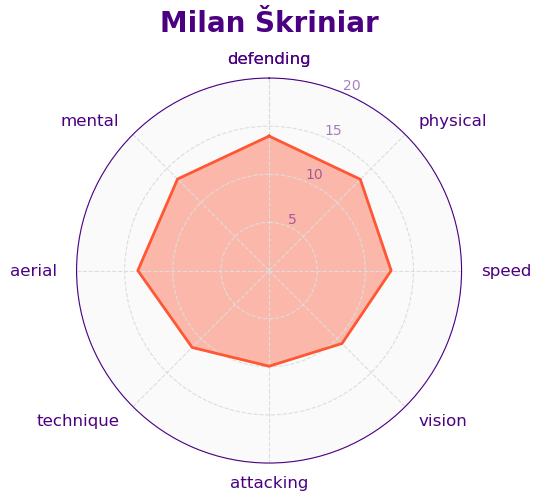

In [887]:
test_name = 'Milan Škriniar'

predictions = mlp.predict(X.loc[[test_name]].values)

test = pd.Series(predictions[0], index=y.columns)
test['Name'] = test_name
test = calculate_skill_nodes(test)
plot_fm_radar(test, gk=False)

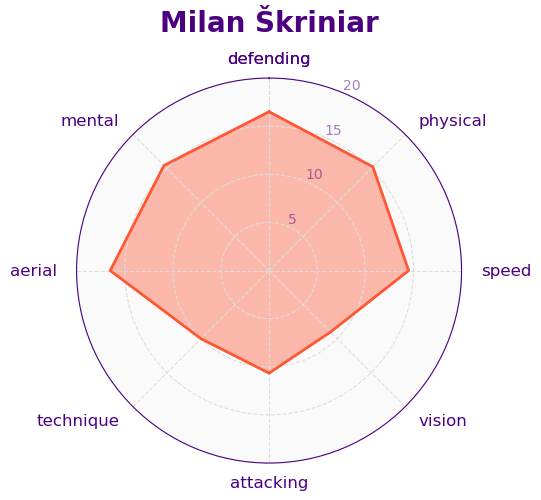

In [888]:
real = y.loc[[test_name]].values

test = pd.Series(real[0], index=y.columns)
test['Name'] = test_name
test = calculate_skill_nodes(test)
plot_fm_radar(test, gk=False)

In [889]:
pd.DataFrame({'prediction':predictions[0],
              'real':real[0]},
              index=predict_columns)

,prediction,real
Corners,5.563780,4
Crossing,8.670527,7
Dribbling,9.899170,9
Finishing,7.322089,10
First Touch,11.980147,10
Free Kick Taking,6.529719,4
Heading,13.495920,17
Long Shots,7.555954,6
Long Throws,9.334654,11
Marking,13.574933,18


In [890]:
print(f'Prediction mean : {predictions[0].mean()}')
print(f'Real mean : {real[0].mean()}')

Prediction mean : 11.737855387202444
Real mean : 12.805555555555555


In [891]:
X_test.index

Index(['Rico Henry', 'Gian Marco Ferrari', 'Simon Terodde', 'Vladimír Coufal',
       'Matty Cash', 'Patrik Schick', 'Francesco Caputo', 'Pape Gueye',
       'Raúl Albiol', 'Josuha Guilavogui',
       ...
       'Vitaly Janelt', 'Sargis Adamyan', 'Andrea Cambiaso',
       'James Ward-Prowse', 'Duván Zapata', 'Álvaro Aguado',
       'Brecht Dejaegere', 'Georginio Wijnaldum', 'Jeffrey Gouweleeuw',
       'Daniele Verde'],
      dtype='object', name='Name', length=304)